In [1]:
#IMPORTS
import warnings
import pandas as pd
import h5py
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import sys
import os
import scipy.signal as sgn
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE
# Aplicação do HDBSCAN
import umap
from sklearn.metrics import silhouette_score
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import HDBSCAN
from tensorflow.keras.models import load_model

import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Conv1DTranspose, BatchNormalization, ELU, Input
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

sys.path.append('../Pre-processing')  
from filters import ecg_filtrado

d:\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
#CARREGAR OS DADOS X
caminho_arquivo = "../Database/exams.csv"
dados = pd.read_csv(caminho_arquivo)

# Selecionar os índices com base nos critérios fornecidos
ecg_normal_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 13] == True) ]
ecg_AF_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 4] == False) & (dados.iloc[:, 5] == False) & (dados.iloc[:, 6] == False) & (dados.iloc[:, 7] == False) & (dados.iloc[:, 8] == False) & (dados.iloc[:, 9] == True)  ]
ecg_ST_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 4] == False) & (dados.iloc[:, 5] == False) & (dados.iloc[:, 6] == False) & (dados.iloc[:, 7] == False) & (dados.iloc[:, 8] == True) & (dados.iloc[:, 9] == False)  ]
ecg_1dAVb_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 4] == True) & (dados.iloc[:, 5] == False) & (dados.iloc[:, 6] == False) & (dados.iloc[:, 7] == False) & (dados.iloc[:, 8] == False) & (dados.iloc[:, 9] == False)  ]
ecg_SB_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 4] == False) & (dados.iloc[:, 5] == False) & (dados.iloc[:, 6] == False) & (dados.iloc[:, 7] == True) & (dados.iloc[:, 8] == False) & (dados.iloc[:, 9] == False)  ]
ecg_todos_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) ]

ecg_normal_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 13] == True) ]
ecg_ST_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 4] == False) & (dados.iloc[:, 5] == False) & (dados.iloc[:, 6] == False) & (dados.iloc[:, 7] == False) & (dados.iloc[:, 8] == True) & (dados.iloc[:, 9] == False)  ]


ecg_ST_id = dados.iloc[ecg_ST_linhas, 0].tolist()
ecg_1dAVb_id = dados.iloc[ecg_1dAVb_linhas, 0].tolist()

ecg_AF_id = dados.iloc[ecg_AF_linhas, 0].tolist()
ecg_normal_id = dados.iloc[ecg_normal_linhas, 0].tolist()
ecg_SB_id = dados.iloc[ecg_SB_linhas, 0].tolist()
ecg_todos_id = dados.iloc[ecg_todos_linhas, 0].tolist()




ecg_ST = ecg_ST_id[:500]
ecg_normal = ecg_normal_id[:10000]
ecg_SB = ecg_SB_id[:300]


ids_ecgs= ecg_ST  +ecg_normal



In [3]:
#CARREGAR OS DADOS X_TREINO
caminho_arquivo = "../Database/exams.csv"
dados = pd.read_csv(caminho_arquivo)

# Selecionar os índices com base nos critérios fornecidos
ecg_normal_linhas = dados.index[((dados.iloc[:, 14] == "exams_part15.hdf5") | (dados.iloc[:, 14] == "exams_part14.hdf5") ) & (dados.iloc[:, 13] == True) ]
ecg_ST_linhas = dados.index[((dados.iloc[:, 14] == "exams_part15.hdf5") | (dados.iloc[:, 14] == "exams_part14.hdf5") ) & (dados.iloc[:, 4] == False) & (dados.iloc[:, 5] == False) & (dados.iloc[:, 6] == False) & (dados.iloc[:, 7] == False) & (dados.iloc[:, 8] == True) & (dados.iloc[:, 9] == False)  ]
ecg_SB_linhas = dados.index[((dados.iloc[:, 14] == "exams_part17.hdf5") | (dados.iloc[:, 14] == "exams_part16.hdf5") ) & (dados.iloc[:, 4] == False) & (dados.iloc[:, 5] == False) & (dados.iloc[:, 6] == False) & (dados.iloc[:, 7] == True) & (dados.iloc[:, 8] == False) & (dados.iloc[:, 9] == False)  ]


ecg_ST_id = dados.iloc[ecg_ST_linhas, 0].tolist()
ecg_normal_id = dados.iloc[ecg_normal_linhas, 0].tolist()
ecg_SB_id = dados.iloc[ecg_SB_linhas, 0].tolist()




ecg_ST = ecg_ST_id[:500]
ecg_normal = ecg_normal_id[:10000]
ecg_SB = ecg_SB_id[:300]



ids_ecgs_treino = ecg_ST 

In [27]:
#X

import h5py
import numpy as np

# Função para obter dados de ECG a partir do arquivo HDF5
def get_ecg_data(file_path, exam_id):
    with h5py.File(file_path, 'r') as f:
        # Obter os IDs dos exames
        exam_ids = np.array(f['exam_id'])

        # Encontrar o índice correspondente ao exam_id de interesse
        exam_index = np.where(exam_ids == exam_id)[0]

        if len(exam_index) == 0:
            raise ValueError("Exam ID não encontrado.")
        else:
            exam_index = exam_index[0]
            # Acessar os tracings de ECG correspondentes ao exam_index
            exam_tracings = f['tracings'][exam_index]
            return exam_tracings

# Caminho para o arquivo HDF5
path_to_file = '../Database/filtered_exams_16_17.hdf5'  # Substitua pelo caminho real do arquivo

exam_ids_to_cluster = ids_ecgs # Substitua pelos IDs reais dos exames

# Define o tamanho do memmap baseado no número de exames
num_exams = len(exam_ids_to_cluster)
shape = (num_exams, 12, 4096)  # Atualize a shape conforme necessário

# Cria um arquivo memmap para armazenar os dados
X = np.memmap('data.dat', dtype='float32', mode='w+', shape=shape)

# Obter os tracings de ECG para cada exam_id e armazenar no memmap
for i, exam_id in enumerate(exam_ids_to_cluster):
    tracings = get_ecg_data(path_to_file, exam_id)
    X[i] = tracings.T

# Usando squeeze
X = np.squeeze(X[:, 1, :])

# Agora você pode usar X_squeezed para os próximos passos de processamento


In [30]:
#X_TREINO
path_to_file = '../Database/filtered_exams_14_15.hdf5'  # Substitua pelo caminho real do arquivo

exam_ids_to_cluster_treino = ids_ecgs_treino  # Substitua pelos IDs reais dos exames

# Lista para armazenar todos os tracings de ECG
all_tracings = []

# Obter os tracings de ECG para cada exam_id e armazenar na lista
for exam_id in exam_ids_to_cluster_treino:
    tracings = get_ecg_data(path_to_file, exam_id)
    aa = np.array(tracings.T)
    all_tracings.append(aa)

# X será um array com um único array dentro, contendo todos os números do tracings.T
X_TREINO = np.array(all_tracings)
 
# Usando squeeze
X_TREINO = np.squeeze(X_TREINO[:, 1, :])

In [6]:
#CARREGAR MODELO

import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Conv1DTranspose, BatchNormalization, ELU, Input
from tensorflow.keras.models import Model

# Define the encoder
def encoder_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=40, kernel_size=16, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ELU()(x)

    x = Conv1D(filters=20, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)
    
    x = Conv1D(filters=20, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)

    x = Conv1D(filters=20, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)

    x = Conv1D(filters=40, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)

    encoded = Conv1D(filters=1, kernel_size=16, strides=1, padding='same')(x)

    return Model(inputs, encoded, name="encoder")

# Define the decoder
def decoder_model(encoded_shape):
    inputs = Input(shape=encoded_shape)
    x = Conv1DTranspose(filters=40, kernel_size=16, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ELU()(x)

    x = Conv1DTranspose(filters=20, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)

    x = Conv1DTranspose(filters=20, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)

    x = Conv1DTranspose(filters=20, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)

    x = Conv1DTranspose(filters=40, kernel_size=16, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ELU()(x)

    decoded = Conv1DTranspose(filters=1, kernel_size=16, strides=2, padding='same')(x)

    return Model(inputs, decoded, name="decoder")

# Define the full autoencoder
def autoencoder_model(input_shape):
    encoder = encoder_model(input_shape)
    decoder = decoder_model(encoder.output_shape[1:])
    
    inputs = Input(shape=input_shape)
    encoded = encoder(inputs)
    decoded = decoder(encoded)
    
    autoencoder = Model(inputs, decoded, name="autoencoder")
    
    return autoencoder




Epoch 1/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 122s 180ms/step - loss: 0.0310 - val_loss: 0.0040
Epoch 2/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 115s 178ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 3/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 113s 176ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 4/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 116s 180ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 5/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 126s 195ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 6/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 117s 181ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 115s 178ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 112s 174ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 114s 177ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 114s 176ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 11/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 112s 174ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 12

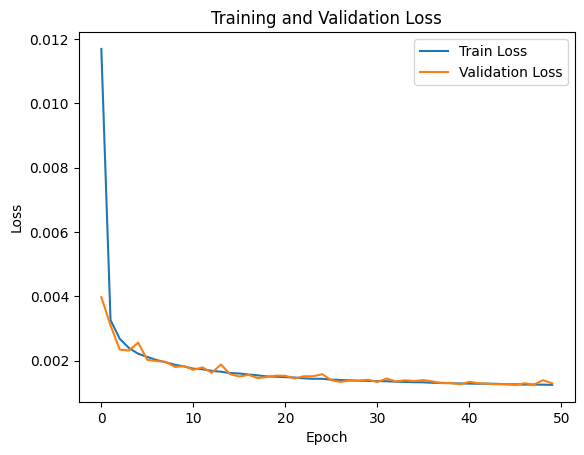

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


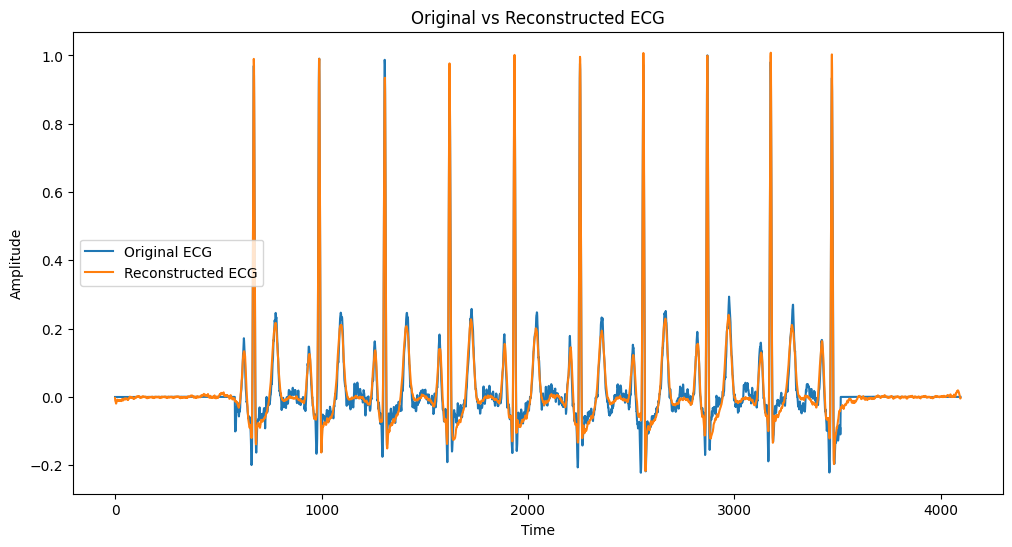

In [8]:
#EXECUTAR MODELO

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

path_to_file = '../Database/filtered_exams_16_17.hdf5'  # Substitua pelo caminho real do arquivo

exam_ids_to_cluster = ids_ecgs  # Substitua pelos IDs reais dos exames

# Define o tamanho do memmap baseado no número de exames
num_exams = len(exam_ids_to_cluster)
shape = (num_exams, 12, 4096)  # Atualize a shape conforme necessário

# Cria um arquivo memmap para armazenar os dados
X = np.memmap('teste.dat', dtype='float32', mode='w+', shape=shape)

# Obter os tracings de ECG para cada exam_id e armazenar no memmap
for i, exam_id in enumerate(exam_ids_to_cluster):
    tracings = get_ecg_data(path_to_file, exam_id)
    X[i] = tracings.T

# Usando squeeze
X = np.squeeze(X[:, 1, :])

epsilon = 1e-8  # Pequeno valor para evitar divisão por zero
X = X / (np.max(np.abs(X), axis=1, keepdims=True) + epsilon)

# Redimensionar os dados para o formato esperado pelo modelo (10500, 4096, 1)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Dividir os dados em conjuntos de treino e teste
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Definir o autoencoder
autoencoder = autoencoder_model((4096, 1))
autoencoder.compile(optimizer='adam', loss='mse')

# Treinar o modelo
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Plotar a perda de treino e validação
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Selecionar um exemplo de ECG para reconstruir
idx = np.random.randint(0, X_test.shape[0])
original_ecg = X_test[idx]

# Reconstruir o ECG usando o autoencoder
reconstructed_ecg = autoencoder.predict(np.expand_dims(original_ecg, axis=0))

# Plotar o ECG original e o reconstruído
plt.figure(figsize=(12, 6))
plt.plot(original_ecg.flatten(), label='Original ECG')
plt.plot(reconstructed_ecg.flatten(), label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Original vs Reconstructed ECG')
plt.show()

# Salvar o modelo treinado no formato Keras
autoencoder.save('autoencoder_model_todos.keras')

# Salvar o modelo treinado
autoencoder.save('autoencoder_model_todos.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


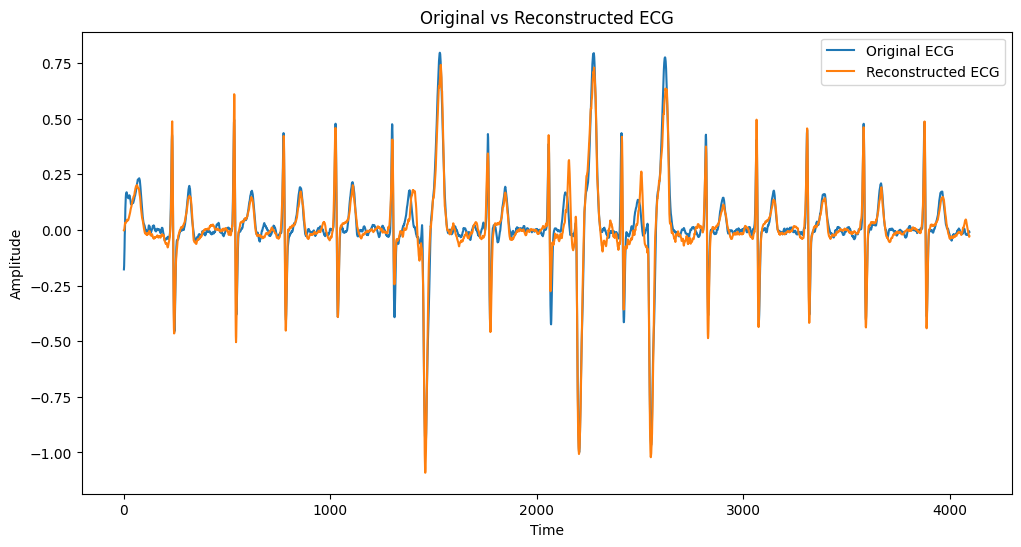

In [33]:
#VER RECONSTRUCAO

# Carregar o modelo salvo no formato Keras
autoencoder = load_model('autoencoder_model_todos.keras')

# Supondo que seu vetor X já esteja carregado como uma matriz numpy com shape (10500, 4096)
# Normalizar os dados entre 0 e 1 (caso ainda não esteja feito)
X = X / np.max(np.abs(X), axis=1, keepdims=True)

# Redimensionar os dados para o formato esperado pelo modelo (10500, 4096, 1)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Selecionar um exemplo de ECG para reconstruir
idx = 10
original_ecg = X[idx]

# Reconstruir o ECG usando o autoencoder carregado
reconstructed_ecg = autoencoder.predict(np.expand_dims(original_ecg, axis=0))

# Plotar o ECG original e o reconstruído
plt.figure(figsize=(12, 6))
plt.plot(original_ecg.flatten(), label='Original ECG')
plt.plot(reconstructed_ecg.flatten(), label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Original vs Reconstructed ECG')
plt.show()

In [28]:
#DIMINUIR DIMENSAO DE X PELO AUTOENCODER(128)

# Carregar o modelo autoencoder
autoencoder = tf.keras.models.load_model('modelos/autoencoder_model.keras')

# Extrair o modelo encoder a partir do autoencoder treinado
encoder = autoencoder.get_layer("encoder")

# Carregar os dados (este é um exemplo, você deve carregar seus dados reais)
# Supondo que seu vetor X já esteja carregado como uma matriz numpy com shape (10500, 4096)
# X = np.load('seu_arquivo_de_dados.npy')

# Normalizar os dados entre 0 e 1 para um melhor desempenho do autoencoder
epsilon = 1e-8  # Pequeno valor para evitar divisão por zero
X = X / (np.max(np.abs(X), axis=1, keepdims=True) + epsilon)

# Redimensionar os dados para o formato esperado pelo modelo (10500, 4096, 1)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Obter os vetores codificados para todo o conjunto X
X_encoded = encoder.predict(X)

# X_encoded agora contém os vetores de 128 números para cada entrada em X
print(X_encoded.shape)  # Deve ser (10500, 128, 1)

# Remover a última dimensão para obter um vetor 2D
X_encoded_2d = np.squeeze(X_encoded)
print(X_encoded_2d.shape)  # Deve ser (10500, 128)

d:\python\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 46 variables whereas the saved optimizer has 90 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
(10500, 128, 1)
(10500, 128)


In [6]:
#DIMINUIR DIMENSAO DE X_TREINO PELO AUTOENCODER(128)


# Carregar o modelo autoencoder
autoencoder = tf.keras.models.load_model('modelos/autoencoder_model.keras')

# Extrair o modelo encoder a partir do autoencoder treinado
encoder = autoencoder.get_layer("encoder")

# Carregar os dados (este é um exemplo, você deve carregar seus dados reais)
# Supondo que seu vetor X_TREINO já esteja carregado como uma matriz numpy com shape (10500, 4096)
# X_TREINO = np.load('seu_arquivo_de_dados.npy')

# Normalizar os dados entre 0 e 1 para um melhor desempenho do autoencoder
X_TREINO = X_TREINO / np.max(np.abs(X_TREINO), axis=1, keepdims=True)

# Redimensionar os dados para o formato esperado pelo modelo (10500, 4096, 1)
X_TREINO = X_TREINO.reshape((X_TREINO.shape[0], X_TREINO.shape[1], 1))

# Obter os vetores codificados para todo o conjunto X_TREINO
X_TREINO_encoded = encoder.predict(X_TREINO)

# X_encoded agora contém os vetores de 128 números para cada entrada em X_TREINO


# Remover a última dimensão para obter um vetor 2D
X_TREINO_encoded_2d = np.squeeze(X_TREINO_encoded)
print(X_TREINO_encoded_2d.shape)  # Deve ser (10500, 128)



c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 46 variables whereas the saved optimizer has 90 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


NameError: name 'X_TREINO' is not defined

In [29]:
#DIMINUIR DIMENSAO DE X PELO UMAP(16)
warnings.filterwarnings('ignore', message="n_jobs value.*overridden to 1 by setting random_state.*")
# Normalizar os dados
nan_mask = np.isnan(X_encoded_2d)
means = np.nanmean(X_encoded_2d, axis=0)
X_encoded_2d[nan_mask] = np.take(means, np.where(nan_mask)[1])

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded_2d)
# Aplicação do UMAP
umap_reducer = umap.UMAP(n_neighbors=5, min_dist=0.0, n_components=16, random_state=42)
X_reduced = umap_reducer.fit_transform(X_normalized)

scaler2 = StandardScaler()
X_reduced_scaled = scaler2.fit_transform(X_reduced)

In [32]:
#DIMINUIR DIMENSAO DE X_TREINO PELO UMAP(16)
warnings.filterwarnings('ignore', message="n_jobs value.*overridden to 1 by setting random_state.*")
# Normalizar os dados
X_TREINO_normalized = scaler.transform(X_TREINO_encoded_2d)
# Aplicação do UMAP

X_TREINO_reduced = umap_reducer.transform(X_TREINO_normalized)

X_TREINO_reduced_scaled = scaler2.transform(X_TREINO_reduced)

<Figure size 2000x2000 with 0 Axes>

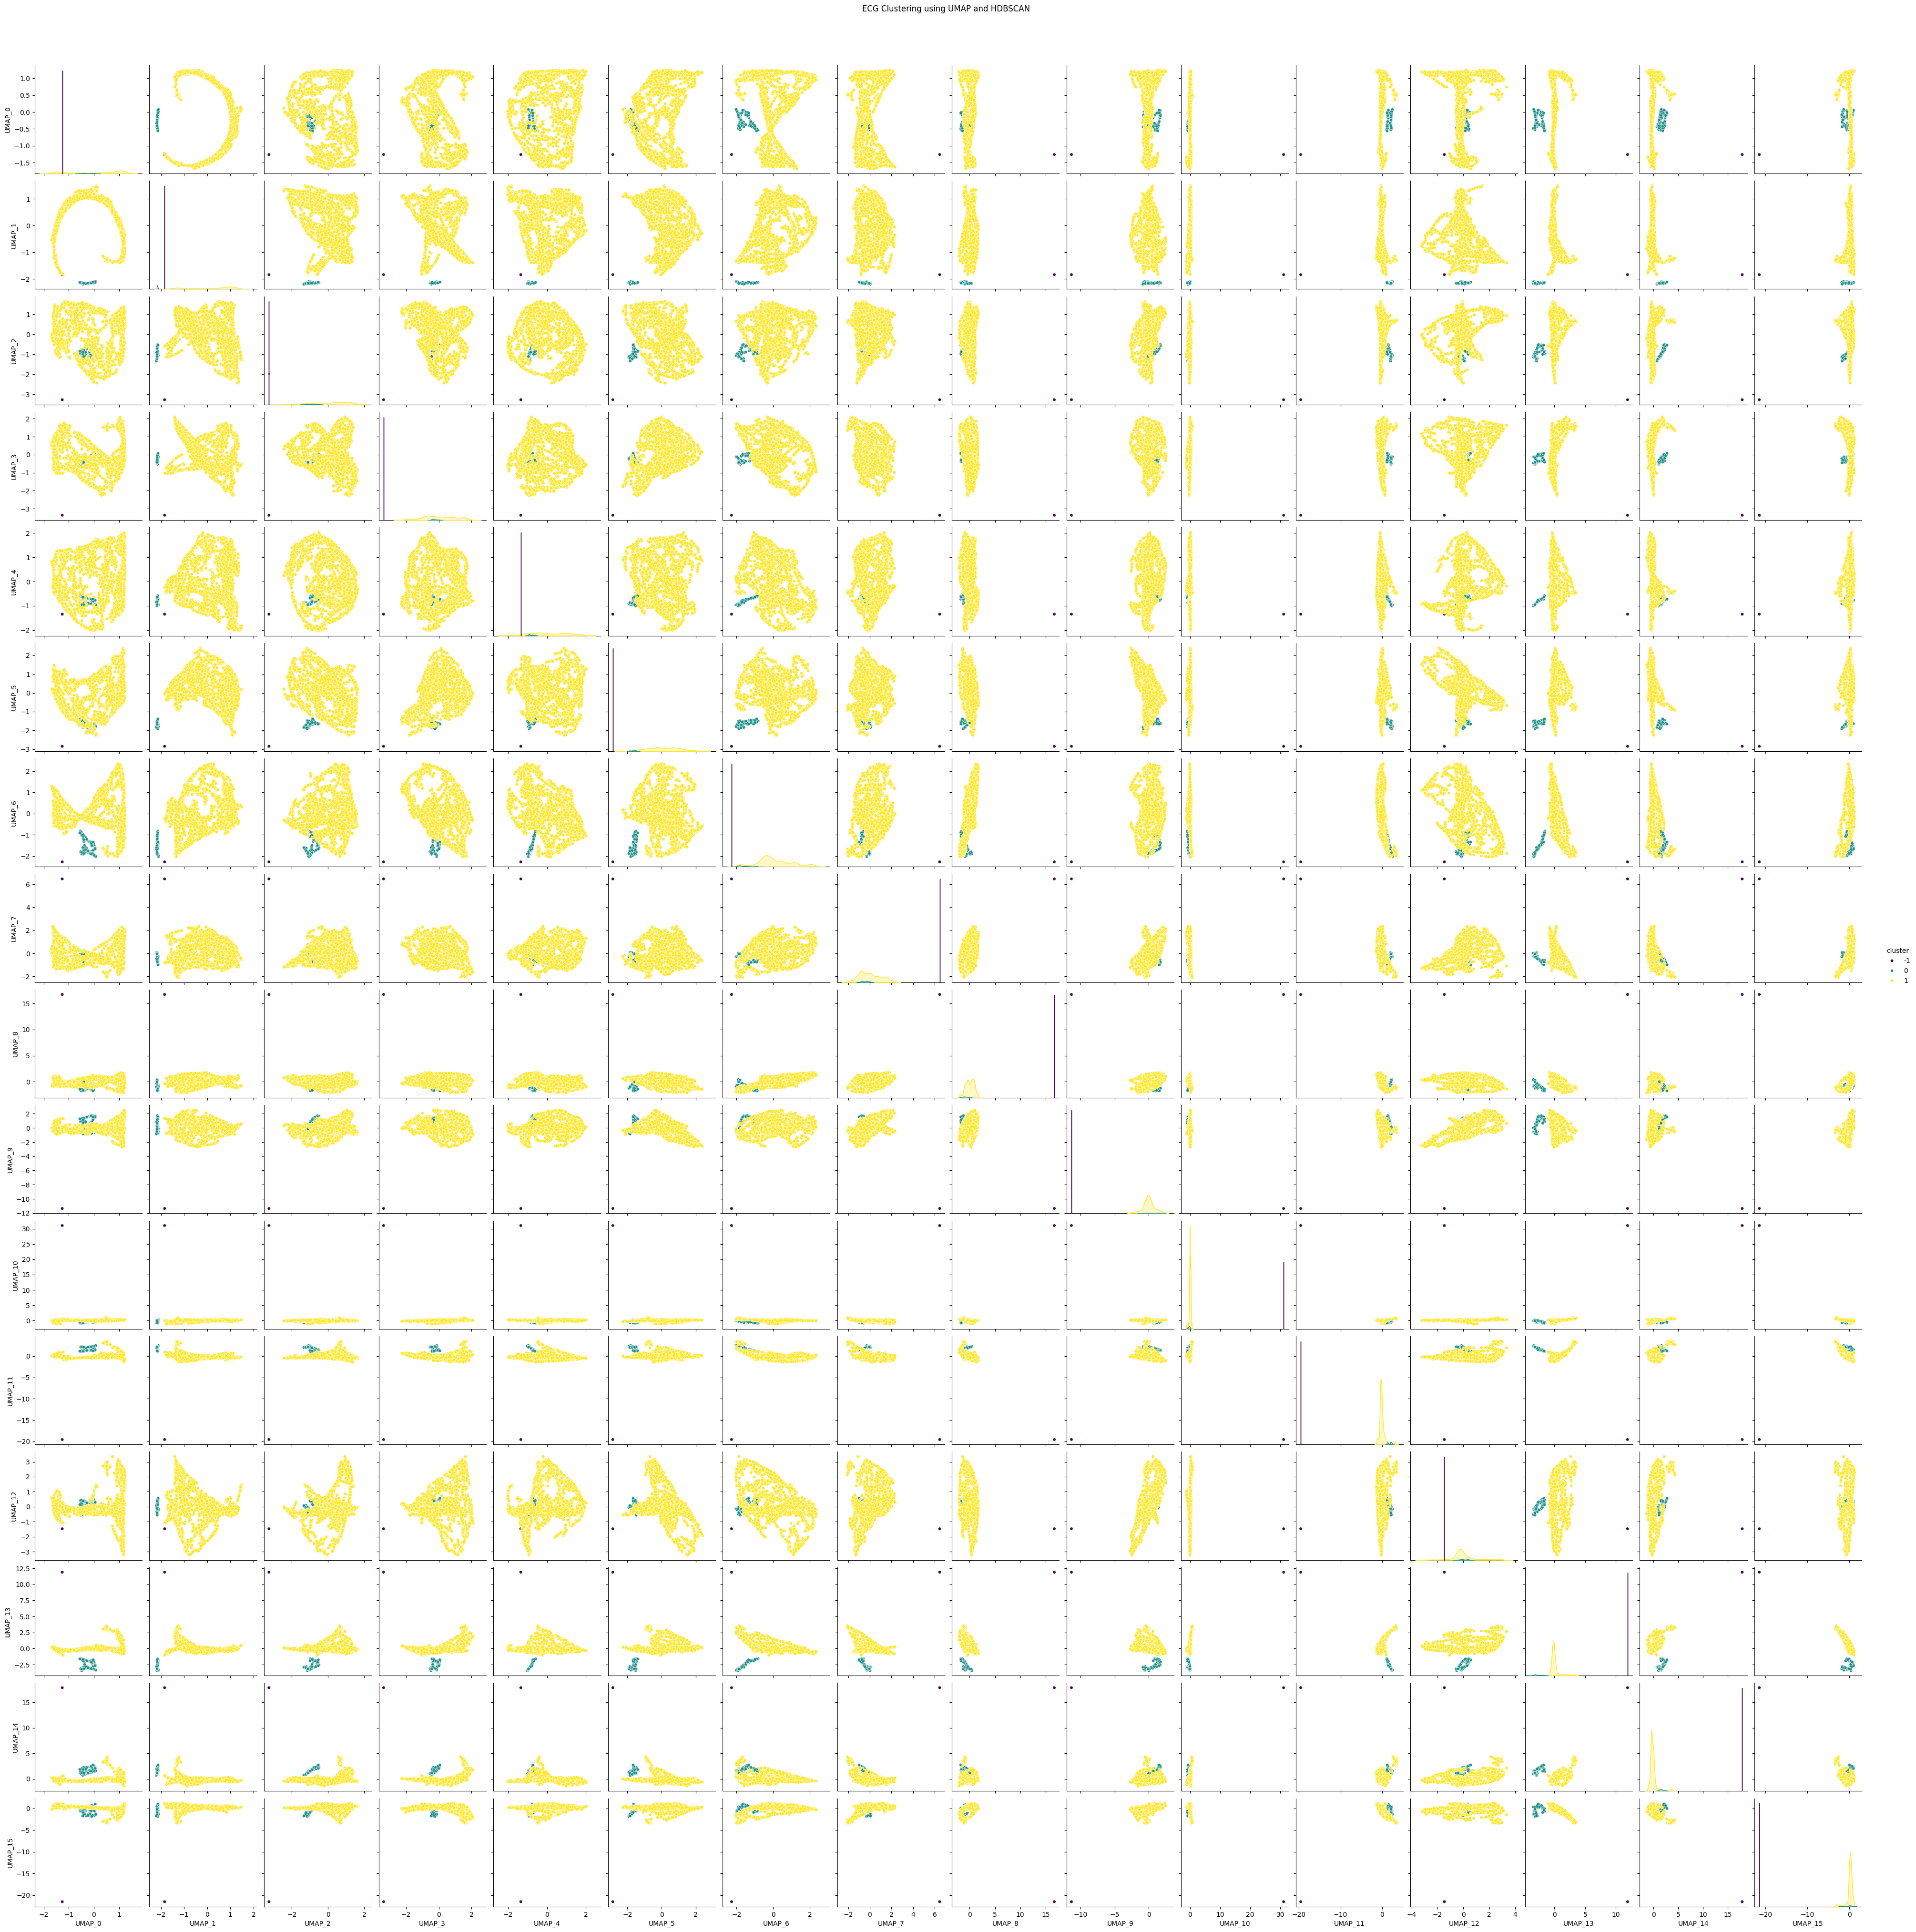

Silhouette Score: 0.28753623366355896
   cluster  1dAVb  RBBB  LBBB  SB   ST  AF  normal_ecg
0       -1      0     0     0   0    0   0          10
1        0      0     0     0   0  361   0          47
2        1      0     0     0   0  139   0        9943


In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score

# Supondo que X_reduced seja o resultado do UMAP com 16 dimensões
scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)

dbscan = HDBSCAN(min_cluster_size=300, min_samples=5)
labels = dbscan.fit_predict(X_reduced_scaled)

# Convertendo para DataFrame
df = pd.DataFrame(X_reduced_scaled, columns=[f'UMAP_{i}' for i in range(X_reduced_scaled.shape[1])])
df['cluster'] = labels

# Visualização dos Resultados
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='cluster', palette='viridis', plot_kws={'s': 20})
plt.suptitle('ECG Clustering using UMAP and HDBSCAN', y=1.02)
plt.show()

# Calcular e imprimir o Silhouette Score
silhouette_avg = silhouette_score(X_reduced_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Carregar os dados do CSV
metadata = pd.read_csv("../Database/exams.csv")

# Criar um DataFrame para os resultados do clustering
cluster_results = pd.DataFrame({
    'exam_id': exam_ids_to_cluster,
    'cluster': labels
})

# Mesclar os resultados do clustering com os metadados dos exames
merged_data = cluster_results.merge(metadata, on='exam_id')

# Contar a quantidade de doenças e ECGs normais em cada cluster
cluster_summary = merged_data.groupby('cluster').agg({
    '1dAVb': 'sum',
    'RBBB': 'sum',
    'LBBB': 'sum',
    'SB': 'sum',
    'ST': 'sum',
    'AF': 'sum',
    'normal_ecg': 'sum'
}).reset_index()

# Mostrar o resumo por cluster
print(cluster_summary)


Silhouette Score médio: 0.28753623366355896

Silhouette Score médio por cluster:
cluster
-1    0.999988
 0    0.661857
 1    0.271682
Name: silhouette_score, dtype: float32


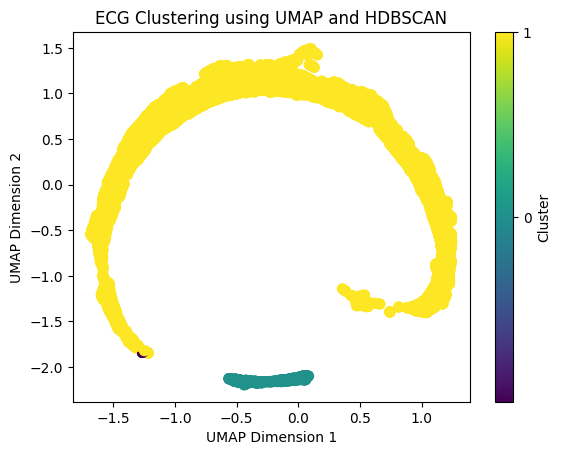

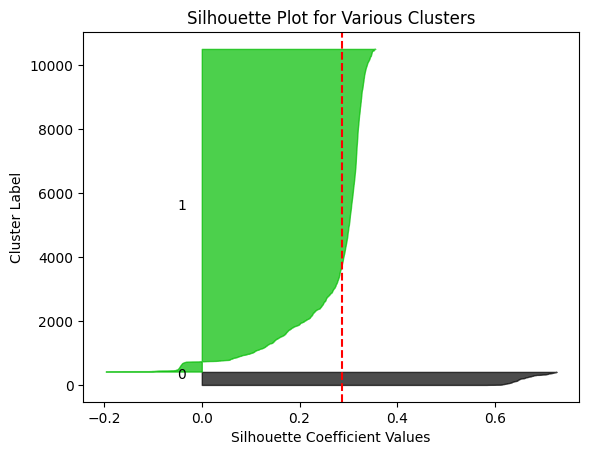

   cluster  1dAVb  RBBB  LBBB  SB   ST  AF  normal_ecg  total  \
0       -1      0     0     0   0    0   0          10     10   
1        0      0     0     0   0  361   0          47    408   
2        1      0     0     0   0  139   0        9943  10082   

   normal_percentage  
0         100.000000  
1          11.519608  
2          98.621305  

Cluster com a menor porcentagem de ECGs normais:
cluster                0.000000
1dAVb                  0.000000
RBBB                   0.000000
LBBB                   0.000000
SB                     0.000000
ST                   361.000000
AF                     0.000000
normal_ecg            47.000000
total                408.000000
normal_percentage     11.519608
Name: 1, dtype: float64

Top 5 ECGs normais com maiores scores de silhueta no cluster com a menor porcentagem de ECGs normais:
       exam_id  silhouette_score
8180   1859574          0.696259
7531   1719373          0.695945
9333   1702843          0.683588
2082   1974758    

C:\Users\GAMER\AppData\Local\Temp\ipykernel_62864\1853477780.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_normals.loc[:, 'distance'] = abs(non_normals['silhouette_score'] - normal_score)


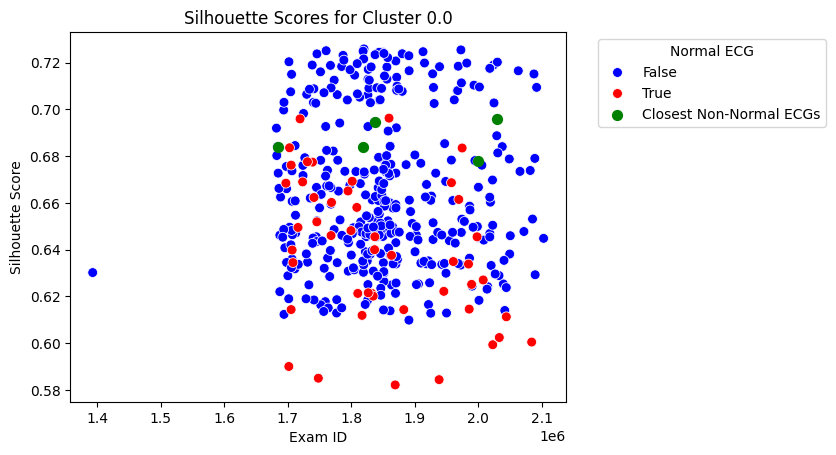

In [57]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hdbscan
from sklearn.metrics import silhouette_samples, silhouette_score

# Supondo que você já tenha os dados X_reduced_scaled e exam_ids_to_cluster

# Realizar a clusterização com HDBSCAN
dbscan = hdbscan.HDBSCAN(min_cluster_size=300, min_samples=5)
labels = dbscan.fit_predict(X_reduced_scaled)

# Calcular o silhouette score médio
silhouette_avg = silhouette_score(X_reduced_scaled, labels)
print(f'Silhouette Score médio: {silhouette_avg}')

# Calcular o silhouette score para cada ponto
silhouette_values = silhouette_samples(X_reduced_scaled, labels)

# Número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Criar um DataFrame para os silhouette scores
silhouette_df = pd.DataFrame({
    'exam_id': exam_ids_to_cluster,
    'cluster': labels,
    'silhouette_score': silhouette_values
})

# Calcular o silhouette score médio para cada cluster separado
cluster_silhouette_avg = silhouette_df.groupby('cluster')['silhouette_score'].mean()
print("\nSilhouette Score médio por cluster:")
print(cluster_silhouette_avg)

# Visualização dos clusters
scatter = plt.scatter(X_reduced_scaled[:, 0], X_reduced_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('ECG Clustering using UMAP and HDBSCAN')
plt.colorbar(label='Cluster', ticks=range(n_clusters))
plt.show()

# Visualização das pontuações de silhueta
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.title('Silhouette Plot for Various Clusters')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.show()

# Carregar os dados do CSV
metadata = pd.read_csv("../Database/exams.csv")

# Criar um DataFrame para os resultados do clustering
cluster_results = pd.DataFrame({
    'exam_id': exam_ids_to_cluster,
    'cluster': labels
})

# Mesclar os resultados do clustering com os metadados dos exames
merged_data = cluster_results.merge(metadata, on='exam_id')

# Contar a quantidade de doenças e ECGs normais em cada cluster
cluster_summary = merged_data.groupby('cluster').agg({
    '1dAVb': 'sum',
    'RBBB': 'sum',
    'LBBB': 'sum',
    'SB': 'sum',
    'ST': 'sum',
    'AF': 'sum',
    'normal_ecg': 'sum'
}).reset_index()

# Calcular a porcentagem de ECGs normais em cada cluster
cluster_summary['total'] = cluster_summary[['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'normal_ecg']].sum(axis=1)
cluster_summary['normal_percentage'] = cluster_summary['normal_ecg'] / cluster_summary['total'] * 100

# Identificar o cluster com a menor porcentagem de ECGs normais
cluster_with_min_normal = cluster_summary.loc[cluster_summary['normal_percentage'].idxmin()]

# Mostrar o resumo por cluster
print(cluster_summary)

# Destacar o cluster com a menor porcentagem de ECGs normais
print("\nCluster com a menor porcentagem de ECGs normais:")
print(cluster_with_min_normal)

# Adicionar uma coluna para indicar se o ECG é normal ou não
silhouette_df = silhouette_df.merge(metadata[['exam_id', 'normal_ecg']], on='exam_id')

# Selecionar os top 5 exames normais com maior silhouette score no cluster escolhido
highlight_cluster = cluster_with_min_normal['cluster']
top_5_normals = silhouette_df[(silhouette_df['cluster'] == highlight_cluster) & (silhouette_df['normal_ecg'] == 1)].nlargest(5, 'silhouette_score')
top_5_normals_low = silhouette_df[(silhouette_df['cluster'] == highlight_cluster) & (silhouette_df['normal_ecg'] == 1)].nsmallest(5, 'silhouette_score')
# Printar os IDs dos 5 primeiros exames normais com maior silhouette score
print("\nTop 5 ECGs normais com maiores scores de silhueta no cluster com a menor porcentagem de ECGs normais:")
print(top_5_normals[['exam_id', 'silhouette_score']])

print("\nTop 5 ECGs normais com menores scores de silhueta no cluster com a menor porcentagem de ECGs normais:")
print(top_5_normals_low[['exam_id', 'silhouette_score']])
# Encontrar os 5 ECGs não normais com silhouette score mais próximos dos 5 normais selecionados
non_normals = silhouette_df[(silhouette_df['cluster'] == highlight_cluster) & (silhouette_df['normal_ecg'] == 0)]

# Adicionar uma coluna 'distance' para calcular a distância dos scores de silhueta
closest_non_normals = []
for _, row in top_5_normals.iterrows():
    normal_score = row['silhouette_score']
    # Utilizar .loc[] para evitar o SettingWithCopyWarning
    non_normals.loc[:, 'distance'] = abs(non_normals['silhouette_score'] - normal_score)
    closest_non_normal = non_normals.loc[non_normals['distance'].idxmin()]
    closest_non_normals.append(closest_non_normal)
    # Remover o ECG não normal mais próximo para evitar repetições
    non_normals = non_normals[non_normals['exam_id'] != closest_non_normal['exam_id']]

closest_non_normals = pd.DataFrame(closest_non_normals)

# Printar os IDs dos 5 ECGs não normais com silhouette score mais próximos dos normais selecionados
print("\nTop 5 ECGs não normais com scores de silhueta mais próximos dos normais selecionados:")
print(closest_non_normals[['exam_id', 'silhouette_score']])

# Plotar os pontos do cluster com menor porcentagem de normais, destacando os normais em vermelho e os não normais mais próximos em verde
sns.scatterplot(
    data=silhouette_df[silhouette_df['cluster'] == highlight_cluster], 
    x='exam_id', 
    y='silhouette_score', 
    hue='normal_ecg', 
    palette={0: 'blue', 1: 'red'},  # 0: Não normal, 1: Normal
    s=50
)
# Adicionar os pontos dos ECGs não normais mais próximos em verde
plt.scatter(
    closest_non_normals['exam_id'],
    closest_non_normals['silhouette_score'],
    color='green',
    s=50,
    label='Closest Non-Normal ECGs'
)
plt.xlabel('Exam ID')
plt.ylabel('Silhouette Score')
plt.title(f'Silhouette Scores for Cluster {highlight_cluster}')
plt.legend(title='Normal ECG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [56]:
from scipy.spatial.distance import pdist, squareform

# Selecionar os dados do cluster de interesse
cluster_points = X_reduced_scaled[labels == highlight_cluster]

# Calcular a matriz de distâncias entre todos os pontos do cluster
distances = pdist(cluster_points, metric='euclidean')
distance_matrix = squareform(distances)




import numpy as np

# Selecionar os dados do cluster de interesse
cluster_mask = labels == highlight_cluster
cluster_points = X_reduced_scaled[cluster_mask]

# Selecionar os IDs e os silhouette scores do cluster de interesse
cluster_exam_ids = silhouette_df.loc[cluster_mask, 'exam_id'].values
cluster_silhouette_scores = silhouette_df.loc[cluster_mask, 'silhouette_score'].values

# Identificar os índices dos ECGs normais e doentes no cluster
normals_mask = silhouette_df.loc[cluster_mask, 'normal_ecg'].values == 1
non_normals_mask = ~normals_mask

# Extrair os índices dos ECGs normais e doentes
normal_indices = np.where(normals_mask)[0]
non_normal_indices = np.where(non_normals_mask)[0]

# Calcular a matriz de distâncias
distances = pdist(cluster_points, metric='euclidean')
distance_matrix = squareform(distances)

# Encontrar o ECG doente mais próximo de um ECG normal
min_distance = np.inf
closest_pair = (None, None)

for non_normal_index in non_normal_indices:
    # Calcular distâncias para todos os ECGs normais
    distances_to_normals = distance_matrix[non_normal_index, normal_indices]

    # Encontrar o menor valor e o índice correspondente
    min_index = np.argmin(distances_to_normals)
    distance = distances_to_normals[min_index]
    
    if distance < min_distance:
        min_distance = distance
        closest_pair = (non_normal_index, normal_indices[min_index])

# Obter os IDs dos ECGs e os silhouette scores
non_normal_id = cluster_exam_ids[closest_pair[0]]
normal_id = cluster_exam_ids[closest_pair[1]]
non_normal_silhouette = cluster_silhouette_scores[closest_pair[0]]
normal_silhouette = cluster_silhouette_scores[closest_pair[1]]

print("ECG doente mais próximo de um ECG normal:")
print(f"ID do ECG doente: {non_normal_id}")
print(f"ID do ECG normal: {normal_id}")
print(f"Distância entre eles: {min_distance:.4f}")
print(f"Silhouette Score do ECG doente: {non_normal_silhouette:.4f}")
print(f"Silhouette Score do ECG normal: {normal_silhouette:.4f}")


ECG doente mais próximo de um ECG normal:
ID do ECG doente: 1863595
ID do ECG normal: 1686261
Distância entre eles: 0.0032
Silhouette Score do ECG doente: -0.1875
Silhouette Score do ECG normal: -0.1879


In [38]:
#IDS DENTRO DOS CLUSTERS
import pandas as pd
from sklearn.cluster import DBSCAN

# Carregar os dados do CSV
metadata = pd.read_csv("../Database/exams.csv")

# Criar um DataFrame para os resultados do clustering
cluster_results = pd.DataFrame({
    'exam_id': exam_ids_to_cluster,
    'cluster': labels
})

# Mesclar os resultados do clustering com os metadados dos exames
merged_data = cluster_results.merge(metadata, on='exam_id')

# Criar um dicionário para armazenar os IDs por doença/condição em cada cluster
ids_by_condition = {
    '1dAVb': {},
    'RBBB': {},
    'LBBB': {},
    'SB': {},
    'ST': {},
    'AF': {},
    'normal_ecg': {}
}

# Preencher o dicionário com os IDs correspondentes
for cluster in merged_data['cluster'].unique():
    cluster_data = merged_data[merged_data['cluster'] == cluster]
    for condition in ids_by_condition.keys():
        ids_by_condition[condition][cluster] = cluster_data[cluster_data[condition] == 1]['exam_id'].tolist()

# Exibir os IDs por condição em cada cluster
for condition, clusters in ids_by_condition.items():
    print(f"Condição: {condition}")
    for cluster, ids in clusters.items():
        print(f"  Cluster {cluster}: {ids}")


Condição: 1dAVb
  Cluster 0: []
  Cluster 1: []
  Cluster -1: []
Condição: RBBB
  Cluster 0: []
  Cluster 1: []
  Cluster -1: []
Condição: LBBB
  Cluster 0: []
  Cluster 1: []
  Cluster -1: []
Condição: SB
  Cluster 0: []
  Cluster 1: []
  Cluster -1: []
Condição: ST
  Cluster 0: [1695452, 1826312, 2024209, 1915489, 2000573, 1826471, 1819139, 1863509, 1947220, 1870388, 1856232, 1841554, 1767311, 1712591, 1682754, 1928946, 1759130, 1797905, 1998775, 1688702, 1706766, 2089276, 1820080, 1926336, 1827889, 1771684, 1698147, 1795349, 1762831, 1686154, 1704985, 1724099, 1702987, 1890933, 1850736, 1724881, 1800132, 1804687, 1819260, 1731262, 1745002, 1861215, 1733367, 1739938, 1779962, 1706971, 1723876, 1751960, 1745386, 1746059, 1925259, 1740456, 2049669, 1921766, 1761282, 1871674, 2063243, 1846036, 1833103, 1918551, 1729883, 1893457, 1851478, 2041980, 1870283, 1848291, 1900545, 2040698, 1923485, 1993448, 1829884, 2008819, 1925338, 1872237, 1902529, 2085657, 1763813, 1857985, 1823421, 1852063

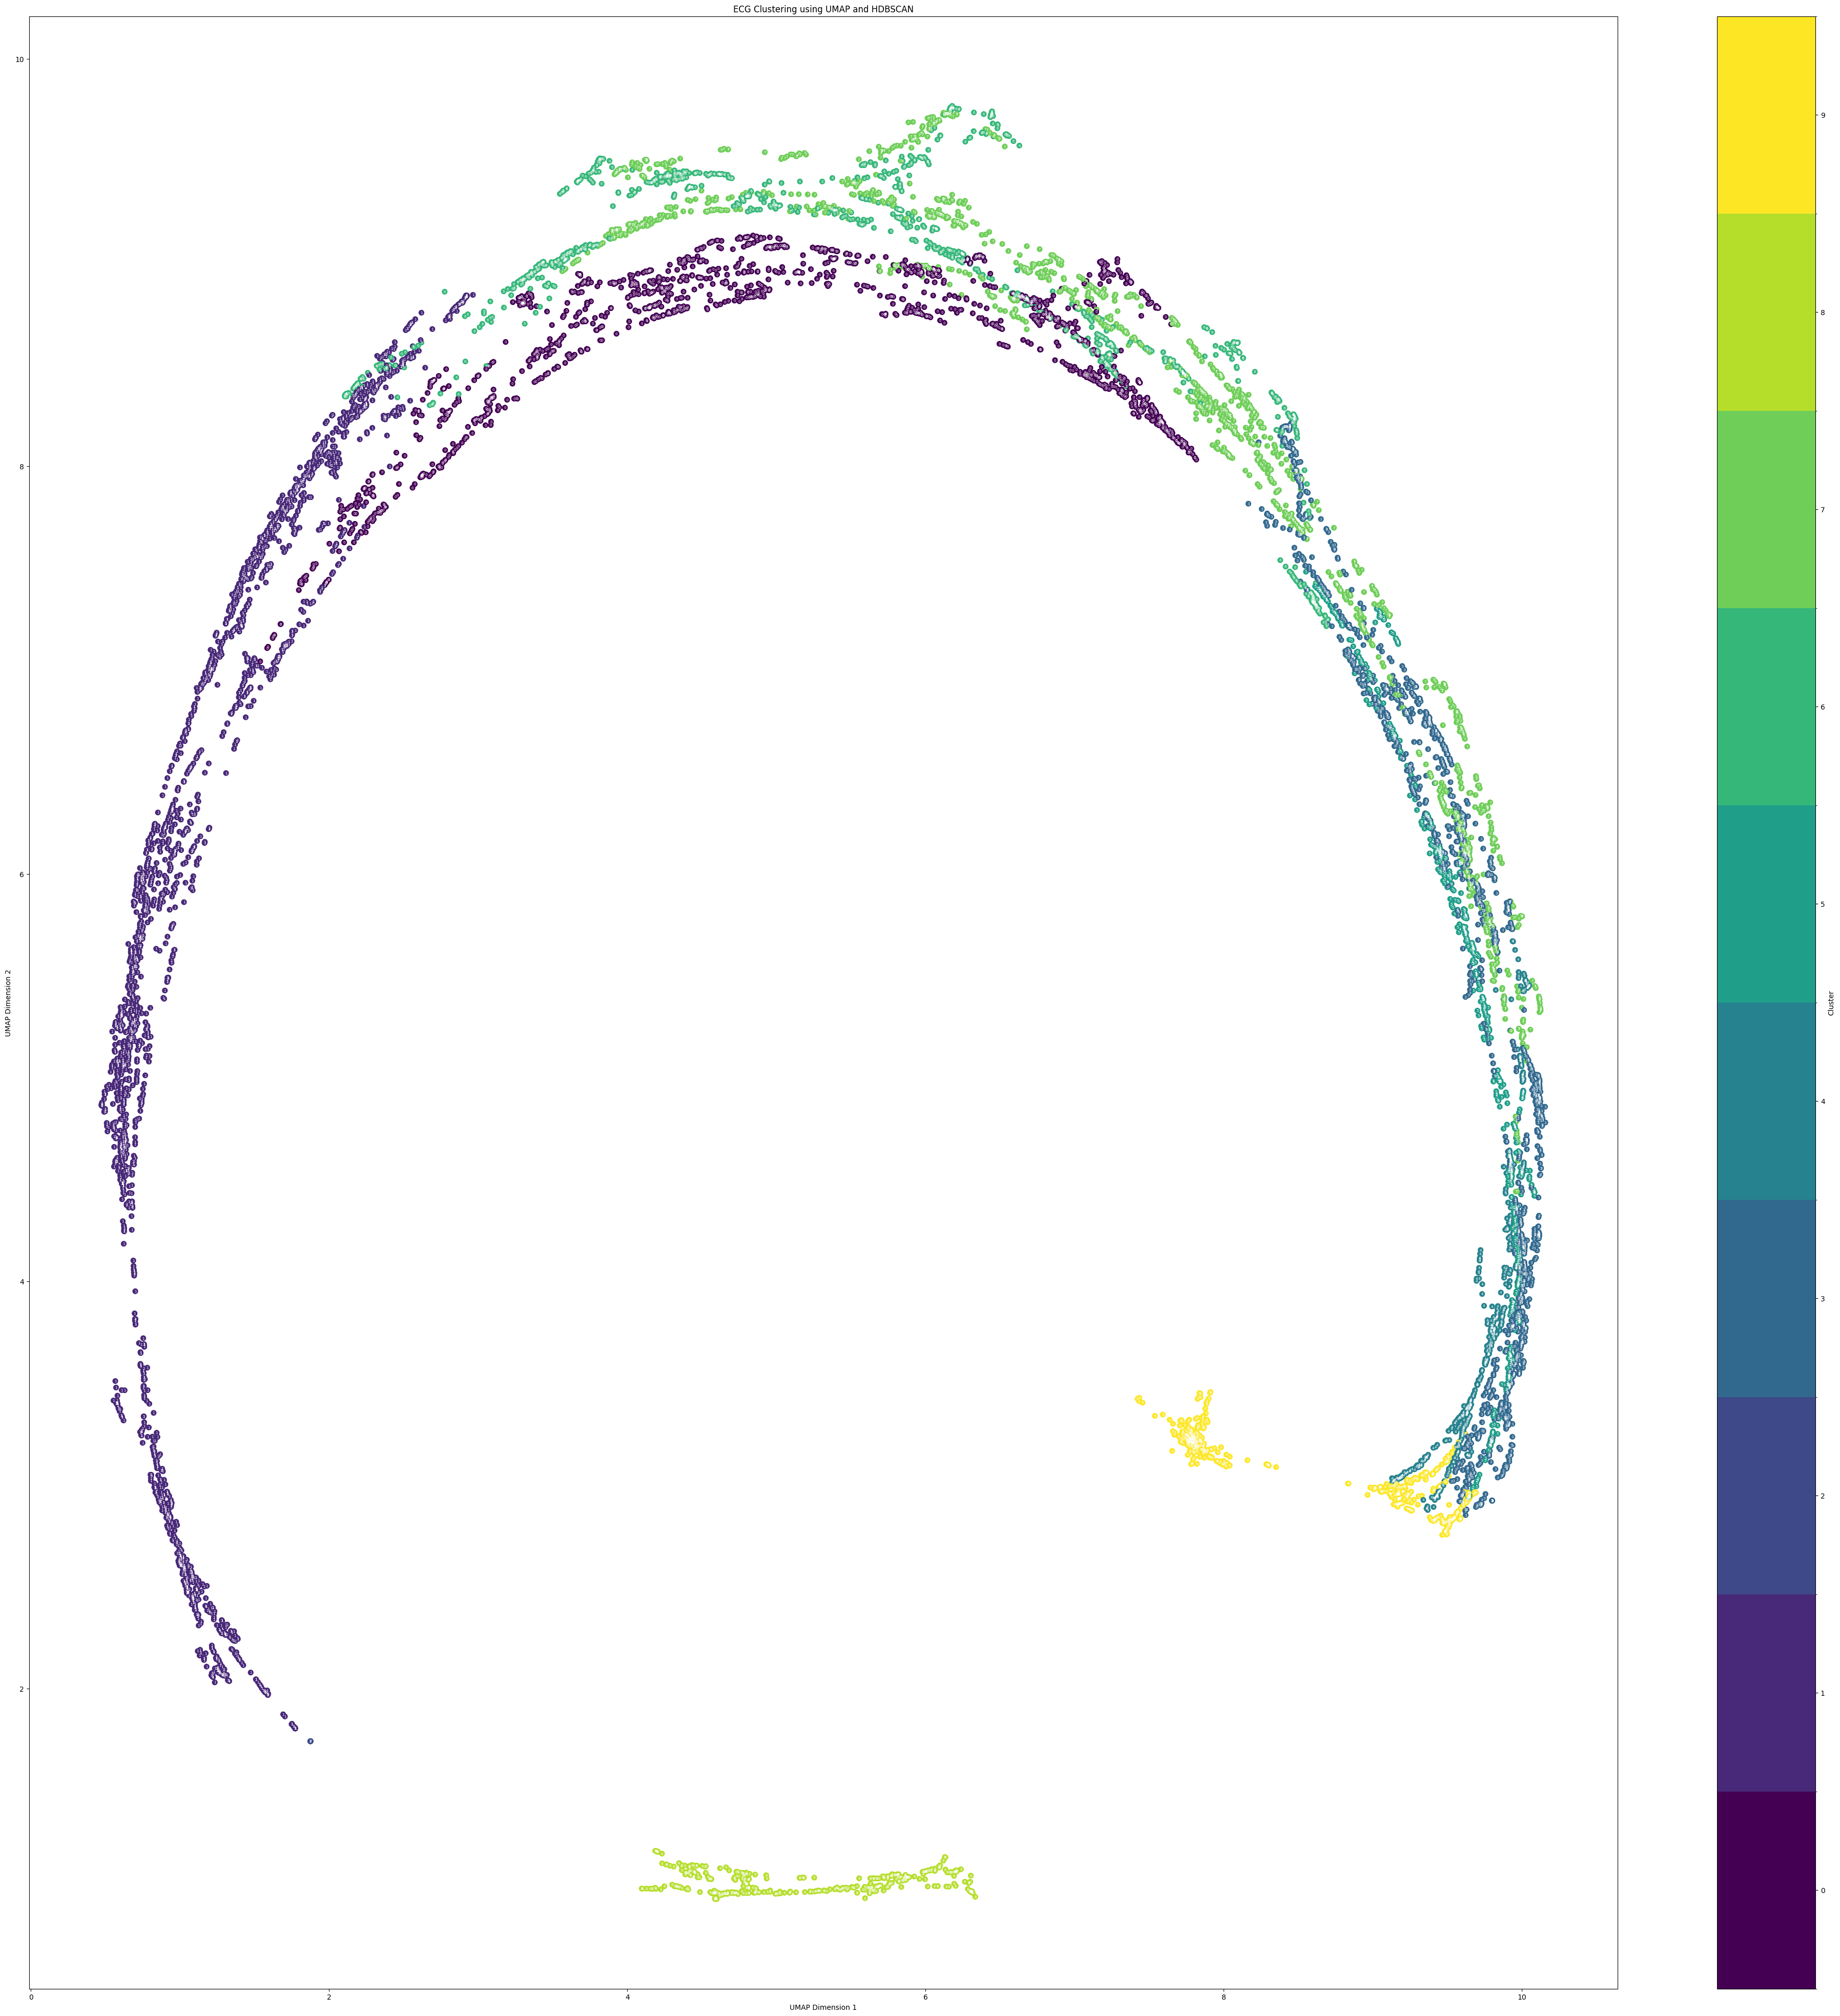

In [36]:
#IMAGEM GRANDE

unique_labels = np.unique(labels)
plt.figure(figsize=(50, 50))

cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(unique_labels))))

# Definindo os limites para a color bar
norm = BoundaryNorm(np.arange(len(unique_labels) + 1) - 0.5, len(unique_labels))

# Plotando o gráfico
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap=cmap, norm=norm, s=50)
# Adicionando os números dos clusters
for i in range(X_reduced.shape[0]):
    plt.text(X_reduced[i, 0], X_reduced[i, 1], str(labels[i]), fontsize=5, ha='center', va='center', color='white')

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('ECG Clustering using UMAP and HDBSCAN')

# Adicionando a color bar
cbar = plt.colorbar(ticks=np.arange(len(unique_labels)), boundaries=np.arange(len(unique_labels) + 1) - 0.5)
cbar.set_label('Cluster')
plt.savefig(f'cluster.png', dpi=300)  # Nome do arquivo com o ID
plt.show()

In [33]:
#PREDIZER O CLUSTER 
# Para predizer novos dados

new_data = X_TREINO_reduced_scaled  # Certifique-se de que seus novos dados estão normalizados corretamente

# Usar o método predict para prever os rótulos dos novos dados
new_labels = kmeans.predict(new_data)

# Configurar para mostrar todos os elementos no print
np.set_printoptions(threshold=np.inf)

print("New labels:", new_labels)

count_3 = np.count_nonzero(new_labels == 2)

print(f"O cluster 2 aparece {count_3} vezes na lista.")

New labels: [5 0 0 0 0 0 0 5 0 0 3 5 0 5 0 3 0 0 4 5 5 5 0 3 5 5 0 5 0 0 0 3 5 0 0 0 0
 0 5 5 0 5 3 5 5 0 5 0 0 3 0 0 0 5 0 0 0 2 0 0 0 5 0 3 3 3 5 0 3 0 0 5 0 0
 0 3 0 0 0 5 0 0 5 0 0 5 0 0 0 0 0 4 0 3 4 0 3 5 0 5 0 0 0 0 5 0 0 0 0 0 0
 4 3 5 0 0 3 0 3 5 0 5 0 0 0 0 4 4 3 0 0 5 5 0 3 5 0 0 0 5 0 0 3 0 0 3 0 4
 0 0 5 0 0 3 0 0 3 3 0 0 0 4 5 4 3 0 0 5 0 4 4 0 0 0 0 0 0 4 0 5 0 5 5 0 3
 0 2 0 3 4 0 0 5 5 0 5 5 0 3 5 0 5 3 0 0 5 3 0 0 0 0 4 0 0 0 0 0 5 0 0 3 0
 5 0 3 0 5 3 3 0 3 3 5 0 0 0 0 0 0 5 3 0 5 5 0 0 0 0 5 0 3 0 3 3 4 3 4 3 3
 0 3 0 0 0 4 3 0 3 0 0 5 0 0 5 3 0 5 5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0
 0 0 5 0 5 0 0 0 0 5 0 0 0 5 0 0 0 5 5 0 0 5 3 0 0 0 5 5 4 0 3 5 0 5 0 5 0
 0 0 0 0 3 5 5 0 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 5 0 0 5 0 3 3 0 0 3 0 0 0 5
 0 5 0 0 0 3 0 0 0 0 3 5 5 0 0 5 0 0 5 0 0 0 3 5 0 0 3 5 3 0 0 0 3 3 0 4 0
 0 0 3 5 0 3 0 0 0 0 0 5 3 0 0 5 0 5 0 0 0 0 0 3 0 5 5 0 5 5 0 0 4 3 0 0 0
 0 3 5 0 0 5 5 5 0 0 5 0 0 5 0 5 0 4 0 5 0 3 0 0 0 3 0 5 0 0 0 5 5 0 0 0 0
 3 0 0 0 5 0 